# Load Libraries

In [1]:
# Import necessary libraries
import pandas as pd  # Library for data manipulation and analysis
import numpy as np  # Library for numerical computing
import glob  # Library for file handling
import re  # Library for regular expressions
from tqdm import tqdm  # Library for creating progress bars

import plotly.graph_objects as go  # Library for creating interactive plots

# Preprocessing
from sklearn import preprocessing  # Library for data preprocessing
import keras  # Deep learning library
from keras.models import Sequential  # Sequential model for stacking layers
from keras.layers.core import Dense, Dropout, Activation  # Layers for fully connected neural networks
from keras.layers import LSTM  # LSTM layer for sequence modeling
from keras.models import load_model  # Loading pre-trained models
import matplotlib.pyplot as plt  # Library for basic data visualization
import h5py  # Library for handling large datasets
import datetime  # Library for date and time operations
import tensorflow as tf  # Deep learning library



2023-06-15 06:43:18.868663: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-15 06:43:19.829162: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


**For preprocessing and modeling**
* sklearn.preprocessing is used for data preprocessing tasks, such as scaling or encoding categorical variables.
* keras is a deep learning library that provides tools for building and training neural networks.
* Sequential is a type of model in Keras that allows stacking layers sequentially.
* Dense represents a fully connected layer in a neural network.
* Dropout is used for regularization by randomly setting input units to 0 during training to prevent overfitting.
* Activation defines the activation function to introduce non-linearity in the neural network.
* LSTM is a type of recurrent neural network layer used for sequence modeling.
* load_model is used to load pre-trained models.
* matplotlib.pyplot is imported as plt for basic data visualization.
* h5py is used for handling large datasets stored in the Hierarchical Data Format (HDF5).
* datetime is used for handling date and time information.
* tensorflow is imported as tf, which is a deep learning library used for various operations.

In [2]:
import tensorflow as tf  # Import the TensorFlow library
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))  # Print the number of available GPUs

# tf.config.list_physical_devices('GPU') retrieves the list of physical devices (GPUs) available for TensorFlow to use.
# len(tf.config.list_physical_devices('GPU')) calculates the length of the list of GPUs.
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU'))) prints the number of available GPUs.

# Summary :
# This code is useful when you want to check the number of GPUs available for your TensorFlow environment. 
# GPUs are commonly used in deep learning for faster computations on large neural networks. 
# Knowing the number of available GPUs can help determine the hardware resources and parallel
# processing capabilities of your system when running TensorFlow-based models.

Num GPUs Available:  1


2023-06-15 06:43:21.004247: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-15 06:43:21.122468: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-15 06:43:21.123003: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
# The code defines a function named plot that takes four parameters: df, x_feature_name,
# y_feature_name, and title. The function is designed to plot data from a dataframe
def plot(df,x_feature_name,y_feature_name,title):
    """
    This function takes two dataframes as input and plots the number of calls per day and per week.

    Args:
    daily_df (pandas.DataFrame): A dataframe containing daily call data.
    weekly_df (pandas.DataFrame): A dataframe containing weekly call data.

    Returns:
    None
    """

    # A new instance of the go.Figure() class from the plotly.graph_objects library is created. This will be used to create the plot
    fig = go.Figure()
    # Add a trace for daily calls
    # A trace is added to the figure using the go.Scatter() class from plotly.graph_objects. 
    # It specifies the x and y data for the plot, assigns a name to the trace, 
    # and sets the mode to display lines and markers.
    fig.add_trace(
        go.Scatter(
            x=df[x_feature_name],
            y=df[y_feature_name],
            name=y_feature_name,
            mode='lines+markers'
        ))

 

    # Update xaxis properties
    # The x-axis and y-axis titles are updated using the update_xaxes() and update_yaxes() methods of the figure object.
    fig.update_xaxes(title_text='Date')

    # Update yaxis properties
    fig.update_yaxes(title_text=y_feature_name)

    # Update title and height
    # The layout of the figure is updated using the update_layout() method. The title, height, and width of the plot are set.
    fig.update_layout(
        title=f'{title}',
        height=500,
        width=1200
    )

    # Show the plot
    # The plot is displayed using the show() method of the figure object.
    fig.show()

    # Write the plot to an HTML file
    # fig.write_html(f'Visualization/btc.html')
# Summary:
# The code defines a function plot() that takes in a dataframe (df), x-axis feature name (x_feature_name),
# y-axis feature name (y_feature_name), and a title. Inside the function, a plot is created using plotly.graph_objects. 
# The provided x and y data from the dataframe are added as a trace to the plot. 
# The x-axis and y-axis titles are updated, along with the plot title, height, and width. 
# The plot is then displayed using fig.show(). There is an optional commented-out line that suggests writing the plot to an HTML file.


In [4]:
# The code defines a function named downsample_dataframe that takes in three parameters: df (the DataFrame to be downsampled), 
# downsampling_frequency (the desired frequency to downsample the DataFrame to), 
# and fill_method (the method to use for filling missing values).
# The function aims to downsample the DataFrame and fill any missing value
def downsample_dataframe(df, downsampling_frequency, fill_method='mean'):
  """
  Downsamples a DataFrame and fills missing values.

  Args:
    df: The DataFrame to downsample.
    downsampling_frequency: The frequency to downsample the DataFrame to.
    fill_method: The method to use to fill missing values.

  Returns:
    The downsampled DataFrame.
  """

  # Convert the Timestamp column to a datetime object.
  # This line converts the 'Timestamp' column in the DataFrame to a datetime object using the pd.to_datetime() function from the pandas library.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])

  # Set the index of the DataFrame to the Timestamp column.
  # This line sets the 'Timestamp' column as the index of the DataFrame using the set_index() method
  df = df.set_index('Timestamp')

  # Fill the missing values.
  # This block of code fills the missing values in the DataFrame based on the specified fill_method. 
  # If fill_method is set to 'mean', the missing values are filled with the mean value of each 
  # column using the fillna() method and df.mean(). If fill_method is set to 'median', 
  # he missing values are filled with the median value of each column using df.median(). 
  # If an invalid fill_method is provided, a ValueError is raised
  if fill_method == 'mean':
    df = df.fillna(df.mean())
  elif fill_method == 'median':
    df = df.fillna(df.median())
  else:
    raise ValueError('Invalid fill_method: {}'.format(fill_method))

  # Downsample the DataFrame.
  # This line downsamples the DataFrame to the specified downsampling_frequency using the resample() method with 
  # downsampling_frequency as the argument. The mean() method is then applied to calculate the mean 
  # value for each downsampled interval. The resulting downsampled DataFrame is returned as the output of the function.
  df = df.resample(downsampling_frequency).mean()
  return df

# Summary:
# The code defines a function downsample_dataframe() that takes in a DataFrame, downsampling frequency, 
# and fill method. The function converts the 'Timestamp' column to a datetime object, sets it as the index, 
# fills missing values based on the specified fill method (mean or median), and then downsamples the DataFrame 
# to the desired frequency using the mean value within each downsampled interval. 
# The resulting downsampled DataFrame is returned as the output of the function




In [5]:
# These lines use the glob module to find all file paths that match the pattern 'GreenD_reduced_version_03/*.csv'. 
# The resulting file paths are stored in path_lists.
# Then, the file paths are sorted alphabetically and assigned to sorted_file_paths
path_lists = glob.glob('GreenD_reduced_version_03/'+'*.csv')
sorted_file_paths = sorted(path_lists)


# This code defines a function extract_digits that takes a string as input and 
# uses regular expressions (re.findall()) to extract digits from the string. 
# It returns the extracted digits as an integer if they exist, otherwise it returns 0.
# Then, the sorted() function is used with key=extract_digits to sort the file
# paths based on the digits extracted from each path. Finally, the sorted file paths are printed
def extract_digits(string):
    # Extract digits from the string using regular expression
    digits = re.findall(r'\d+', string)
    return int(digits[0]) if digits else 0

sorted_file_paths = sorted(path_lists, key=extract_digits)
print(sorted_file_paths)


# In this block of code, an empty list conct_list is created. Then, a loop is executed over each sorted
# file path using sorted_file_paths. Inside the loop, each CSV file is read using pd.read_csv(),
# and the 'Timestamp' column is converted to a datetime object using pd.to_datetime() w
# ith the utc=True parameter and unit='s' to indicate that the values are in Unix timestamp format. 
# The 'Timestamp' column is then formatted to a specific string format '%Y-%m-%d %H:%M:%S' 
# using the dt.strftime() function. The resulting dataframe is appended to the conct_list

conct_list = []
for path in tqdm(sorted_file_paths ,desc='processing'):
    
    data = pd.read_csv(path)
    data['Timestamp'] = pd.to_datetime(data['Timestamp'],utc=True,unit='s')#format='%Y-%m-%d %H-%M-%S')
    data['Timestamp'] = data['Timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')
    conct_list.append(data)
    
# The !mkdir command creates a directory named 'Combined-Dataset-version-03' 
# if it doesn't already exist. Then, pd.concat() is used to concatenate all 
# the dataframes in conct_list along the rows, creating a single combined dataframe named df
!mkdir 'Combined-Dataset-version-03'
df = pd.concat(conct_list)


# Summary:
# The code reads multiple CSV files located in the 'GreenD_reduced_version_03/' directory. 
# The file paths are sorted in ascending order based on the digits extracted from each path using a custom function.
# Each file is then loaded into a dataframe, and the 'Timestamp' column is converted to a datetime object and formatted.
# The dataframes are appended to a list. A new directory named 'Combined-Dataset-version-03' is created,
# and all the dataframes in the list are concatenated into a single dataframe named df.

['GreenD_reduced_version_03/greend_dataset_466.csv', 'GreenD_reduced_version_03/greend_dataset_341.csv', 'GreenD_reduced_version_03/greend_dataset_137.csv', 'GreenD_reduced_version_03/greend_dataset_32.csv', 'GreenD_reduced_version_03/greend_dataset_370.csv', 'GreenD_reduced_version_03/greend_dataset_35.csv', 'GreenD_reduced_version_03/greend_dataset_180.csv', 'GreenD_reduced_version_03/greend_dataset_204.csv', 'GreenD_reduced_version_03/greend_dataset_114.csv', 'GreenD_reduced_version_03/greend_dataset_377.csv', 'GreenD_reduced_version_03/greend_dataset_338.csv', 'GreenD_reduced_version_03/greend_dataset_179.csv', 'GreenD_reduced_version_03/greend_dataset_363.csv', 'GreenD_reduced_version_03/greend_dataset_80.csv', 'GreenD_reduced_version_03/greend_dataset_78.csv', 'GreenD_reduced_version_03/greend_dataset_464.csv', 'GreenD_reduced_version_03/greend_dataset_74.csv', 'GreenD_reduced_version_03/greend_dataset_365.csv', 'GreenD_reduced_version_03/greend_dataset_387.csv', 'GreenD_reduced_

processing:   0%|          | 0/472 [00:00<?, ?it/s]

processing: 100%|██████████| 472/472 [00:31<00:00, 14.97it/s]

mkdir: cannot create directory ‘Combined-Dataset-version-03’: File exists


In [6]:
df.sort_values(by='Timestamp',inplace=True)
# This line of code sorts the DataFrame df based on the values in the 'Timestamp' column in ascending order. 
# The sort_values() function is used to perform the sorting operation. The by parameter specifies 
# the column to sort by, which in this case is 'Timestamp'. The inplace=True parameter is
# used to modify the DataFrame df in place, meaning the changes are applied directly to the DataFrame instead of creating a new sorted DataFrame

<Figure size 800x600 with 0 Axes>

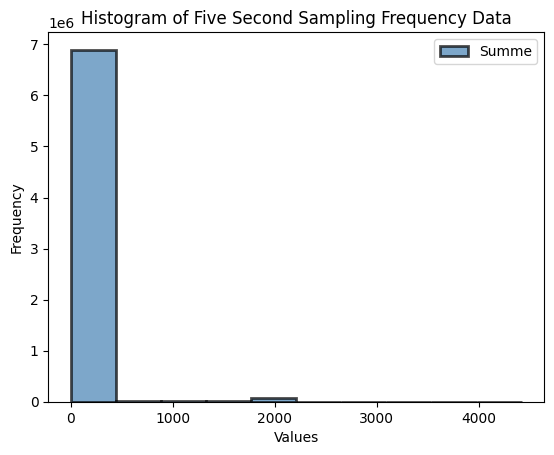

In [7]:
import matplotlib.pyplot as plt

# Customize the histogram plot
# This line creates a new figure object with a specific size of 8 inches by 6 inches. The figsize parameter is used to set the width and height of the figure in inches.
plt.figure(figsize=(8, 6))  # Set the figure size

# Plot the histogram
# This line plots a histogram using the plot.hist() method of the DataFrame df. It specifies the following parameters:

# bins=10: Sets the number of bins (bars) in the histogram to 10.
# edgecolor='black': Sets the color of the edges of the bars to black.
# alpha=0.7: Sets the transparency of the bars to 0.7 (partially transparent).
# color='steelblue': Sets the color of the bars to steel blue.
# linewidth=2: Sets the width of the bar edge lines to 2 pixels.
df.plot.hist(
    bins=10,                   # Number of bins
    edgecolor='black',         # Color of the edges of the bars
    alpha=0.7,                 # Transparency of the bars
    color='steelblue',         # Color of the bars
    linewidth=2,               # Width of the bar edge lines
)

# Customize the plot labels and title
plt.title('Histogram of Five Second Sampling Frequency Data')    # Set the title
plt.xlabel('Values')              # Set the x-axis label
plt.ylabel('Frequency')           # Set the y-axis label

# Show the plot
plt.savefig('5sec.png')

plt.show()

# Summary:
# The code creates a histogram plot using the plot.hist() method of the DataFrame df. 
# It customizes the plot by specifying the number of bins, edge color, transparency, 
# bar color, and line width. The plot is given a title, x-axis label, and y-axis label. 
# The resulting plot is saved as an image file named '5sec.png', and then it is displayed on the screen

In [8]:

# Downsample the DataFrame to 1-hour frequency and fill missing values using mean imputation.
# df_1_hour = downsample_dataframe(df, '1H', fill_method='mean'): The downsample_dataframe() function is called to downsample the DataFrame df to a 1-hour frequency and fill missing values using mean imputation. The resulting downsampled DataFrame is assigned to the variable df_1_hour.
# df_1_hour.reset_index('Timestamp', inplace=True): The index of the DataFrame df_1_hour is reset, converting the 'Timestamp' column from the index back to a regular column. The reset_index() method is used, and the inplace=True parameter is set to modify the DataFrame in place.
# df_1_hour.fillna(method='ffill', inplace=True): Missing values in the DataFrame df_1_hour are filled using forward fill (ffill) method, which propagates the last observed value forward. The fillna() method is used, and the inplace=True parameter is set to modify the DataFrame in place

df_1_hour = downsample_dataframe(df, '1H', fill_method='mean')
df_1_hour.reset_index('Timestamp',inplace=True)
df_1_hour.fillna(method='ffill',inplace=True)


# df_daily = downsample_dataframe(df, '24H', fill_method='mean'): The downsample_dataframe() function is called to downsample the DataFrame df to a daily frequency (24 hours) and fill missing values using mean imputation. The resulting downsampled DataFrame is assigned to the variable df_daily.
# df_daily.reset_index('Timestamp', inplace=True): The index of the DataFrame df_daily is reset, converting the 'Timestamp' column from the index back to a regular column. The reset_index() method is used, and the inplace=True parameter is set to modify the DataFrame in place.
# df_daily.fillna(method='ffill', inplace=True): Missing values in the DataFrame df_daily are filled using forward fill (ffill) method, which propagates the last observed value forward. The fillna() method is used, and the inplace=True parameter is set to modify the DataFrame in place.
# Downsample the DataFrame to 1-hour frequency and fill missing values using mean imputation.
df_daily = downsample_dataframe(df, '24H', fill_method='mean')
df_daily.reset_index('Timestamp',inplace=True)
df_daily.fillna(method='ffill',inplace=True)

# Summary:
# The code performs downsampling of the original DataFrame df to different 
# frequencies (1-hour and daily) using the downsample_dataframe() function.
# Missing values are filled using mean imputation, and the resulting downsampled
# DataFrames (df_1_hour and df_daily) are modified in place to reset the index and fill missing values using forward fill.

<Figure size 800x600 with 0 Axes>

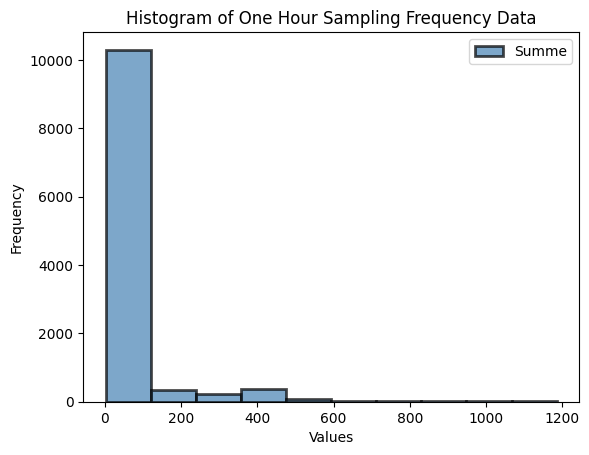

In [9]:
import matplotlib.pyplot as plt

# Customize the histogram plot
plt.figure(figsize=(8, 6))  # Set the figure size

# Plot the histogram
df_1_hour.plot.hist(
    bins=10,                   # Number of bins
    edgecolor='black',         # Color of the edges of the bars
    alpha=0.7,                 # Transparency of the bars
    color='steelblue',         # Color of the bars
    linewidth=2,               # Width of the bar edge lines
)

# Customize the plot labels and title
plt.title('Histogram of One Hour Sampling Frequency Data')    # Set the title
plt.xlabel('Values')              # Set the x-axis label
plt.ylabel('Frequency')           # Set the y-axis label

# Show the plot
plt.savefig('1-Hours.png')

plt.show()
# Summary:
# The code creates a histogram plot using the plot.hist() method of the DataFrame df_1_hour. 
# It customizes the plot by specifying the number of bins, edge color, transparency, 
# bar color, and line width. The plot is given a title, x-axis label, and y-axis label. 
# The resulting plot is saved as an image file named '1-Hours.png', and then it is displayed on the screen.

In [10]:
# df_1_hour.dropna(inplace=True)

In [11]:
# convert an array of values into a dataset matrix
# This code defines a function named create_dataset that takes a dataset and an optional parameter look_back as input. It returns two values as a tuple
def create_dataset(dataset, look_back=15):
    """_summary_

    Args:
        dataset (_type_): _description_
        look_back (int, optional): _description_. Defaults to 15.

    Returns:
        _type_: _description_
    """
    # These lines initialize empty lists dataX and dataY
    dataX, dataY = [], []
    # This line starts a loop that iterates over the range from 0 to len(dataset)-look_back-1.
    # It will loop over the indices of the dataset, excluding the last look_back + 1 elements.
    for i in range(len(dataset)-look_back-1):
        # These lines extract a subsequence of length look_back from the dataset starting from index i. 
        # It assigns the subsequence to variable a and appends it to the dataX list.
        # It also appends the element at index i + look_back from the dataset to the dataY list
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
        # print('Value of a : {}'.format(a))
        # print('Value of y : {}'.format(dataset[i + look_back, 0]))
        
    # This line converts dataX and dataY lists into NumPy arrays and returns them as the output of the functio
    return np.array(dataX), np.array(dataY)
# Summary:
# The create_dataset function takes a dataset as input and creates input-output pairs for a sequence prediction problem. 
# It uses a sliding window approach to extract subsequences of length look_back from the dataset and assigns
# them as input sequences (dataX). The element following each input sequence is assigned as the corresponding output value (dataY). 
# The function returns the input and output sequences as NumPy arrays.

In [12]:
data_df = df_1_hour

In [13]:
plot(data_df,x_feature_name='Timestamp',y_feature_name='Summe',title='Sampling Frequency 1 Hours')



In [14]:
plot(df_daily,x_feature_name='Timestamp',y_feature_name='Summe',title='Sampling Frequency Daily')



In [15]:
import numpy as np
import math
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

# def create_dataset(data, look_back=20):
#     X, Y = [], []
#     for i in range(len(data) - look_back):
#         X.append(data[i:(i + look_back)])
#         Y.append(data[i + look_back])
#     return np.array(X), np.array(Y)

data_df = df_1_hour # Your data dataframe
# These lines perform feature scaling on the 'Summe' column of the DataFrame data_df 
# using Min-Max scaling. It creates an instance of MinMaxScaler and fits it to the data, 
# transforming the values to the range [0, 1]. The scaled data is assigned to the variable dataset
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset = min_max_scaler.fit_transform(data_df['Summe'].values.reshape(-1, 1))

# split into train, validation, and test sets
# These lines split the dataset into train, validation, and test sets based on specified proportions.
# It calculates the sizes of each set and assigns the corresponding subsets of dataset to train_data, val_data, and test_data
train_size = int(len(dataset) * 0.7)
val_size = int(len(dataset) * 0.2)
test_size = len(dataset) - train_size - val_size

train_data = dataset[:train_size]
val_data = dataset[train_size:train_size+val_size]
test_data = dataset[train_size+val_size:]

# create train, validation, and test datasets
# These lines call the create_dataset function to create input-output pairs for the train, validation, 
# and test sets. The function takes the respective subsets of data (train_data, val_data, test_data) 
# and a look_back parameter, and returns input (x) and output (y) sequences. 
# The input-output pairs are assigned to x_train, y_train, x_val, y_val, x_test, and y_test
look_back = 20
x_train, y_train = create_dataset(train_data, look_back)
x_val, y_val = create_dataset(val_data, look_back)
x_test, y_test = create_dataset(test_data, look_back)


# reshape the input data
# These lines reshape the input sequences (x_train, x_val, x_test) to match the required input shape for the LSTM model. 
# The new shape is (batch_size, timesteps, features), where batch_size is the number of samples,
# timesteps is the number of time steps, and features is the number of features.
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_val = np.reshape(x_val, (x_val.shape[0], 1, x_val.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

# print the sizes of the datasets
print('Training Data Size:', train_data.shape)
print('Validation Data Size:', val_data.shape)
print('Testing Data Size:', test_data.shape)

# Summary:
# The code performs the following steps:

# Assigns a DataFrame to data_df.
# Performs Min-Max scaling on a specific column of the DataFrame.
# Splits the scaled dataset into train, validation, and test sets.
# Calls the create_dataset function to create input-output pairs for the train, validation, and test sets.
# Reshapes the input sequences to match the required shape for the LSTM model.
# Prints the sizes of the train, validation, and test datasets.


Training Data Size: (7973, 1)
Validation Data Size: (2278, 1)
Testing Data Size: (1140, 1)


# Model Building | Fitting

In [16]:

# Check if GPU is available
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("GPU is available.")
    print("List of physical GPUs:")
    for device in physical_devices:
        print(device)
else:
    print("GPU is not available. Using CPU instead.")
    
    
# Summary:
# The code checks if a GPU is available and sets the memory growth option if it is.
# It then prints the availability and a list of physical GPUs if present
# . If no GPU is available, it prints a message indicating the use of the CPU instead.

GPU is available.
List of physical GPUs:
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

# Set the model parameters
# These lines define the model parameters, including the number of epochs, batch size, number of LSTM layers, and the input window size.
num_epochs = 100
batch_size = 16
num_layers = 4
input_window=20

# Create the LSTM model
# These lines define the architecture of the LSTM model using the Sequential API.
# The model consists of multiple LSTM layers with different configurations,
# followed by a Dense layer. The input shape of the model is defined based on the look_back value.
model = Sequential()
model.add(LSTM(input_window, input_shape=(1, look_back), return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(30, return_sequences=True))
model.add(LSTM(5, return_sequences=True))
model.add(Dense(1))

# Compile the model
# This line compiles the model by specifying the loss function and optimizer to use during training.
model.compile(loss='mean_absolute_error', optimizer='adam')

# Get the model's parameters
# This line calculates the total number of trainable parameters in the model and assigns it to the model_params variable.
model_params = model.count_params()

# Create the model name based on parameters and training settings
# This line creates a string that represents the model name based on the model's parameters and training settings.
model_name = f"model_{num_epochs}_epochs_{batch_size}_batch_{num_layers}_layers_{model_params}_params_input_window_{input_window}"


# Define early stopping callback
# This line defines an EarlyStopping callback that monitors the validation loss and stops training if the loss does not improve for a specified number of epochs.
early_stopping = EarlyStopping(patience=10,
                               monitor = 'val_loss', 
                               restore_best_weights=True)

# Define TensorBoard callback with model-specific log folder
# This line defines a TensorBoard callback that logs training information and metrics to a specified directory.
tb_callback = TensorBoard(log_dir=f'logs/{model_name}/', write_graph=True, update_freq='epoch')

# Define model checkpoint callback with model-specific filename
# This line defines a ModelCheckpoint callback that saves the model's weights to a file after each epoch, only saving the best weights based on the validation loss.
checkpoint_callback = ModelCheckpoint(f'checkpoints/{model_name}_{{epoch:02d}}.h5', save_weights_only=True, save_best_only=True)

# Train the model with early stopping, checkpoints, and TensorBoard
# This line trains the model using the fit function, providing the training and validation data, 
# number of epochs, batch size, verbosity level, and the defined callbacks for early stopping,
# TensorBoard, and model checkpointing. The training history is stored in the history variable
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), 
                    epochs=num_epochs, 
                    batch_size=batch_size, 
                    verbose=2,
                    callbacks=[early_stopping, tb_callback, checkpoint_callback])

# Print model summary
# This line prints a summary of the model's architecture and the number of trainable parameters.
print(model.summary())

# Summary:
# The code builds and trains an LSTM model with specified parameters and settings. It defines the model architecture, 
# compiles the model, sets up callbacks for early stopping, TensorBoard, and model checkpointing, 
# and trains the model using the provided data. Finally, it prints a summary of the model's architecture and parameters.

2023-06-15 06:44:03.019171: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-15 06:44:03.019500: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-15 06:44:03.019648: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Epoch 1/100


2023-06-15 06:44:04.985001: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-15 06:44:04.986909: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-15 06:44:04.988270: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

497/497 - 10s - loss: 0.0335 - val_loss: 0.0324 - 10s/epoch - 20ms/step
Epoch 2/100
497/497 - 3s - loss: 0.0334 - val_loss: 0.0328 - 3s/epoch - 5ms/step
Epoch 3/100
497/497 - 3s - loss: 0.0334 - val_loss: 0.0324 - 3s/epoch - 5ms/step
Epoch 4/100
497/497 - 3s - loss: 0.0334 - val_loss: 0.0325 - 3s/epoch - 5ms/step
Epoch 5/100
497/497 - 3s - loss: 0.0333 - val_loss: 0.0328 - 3s/epoch - 5ms/step
Epoch 6/100
497/497 - 3s - loss: 0.0334 - val_loss: 0.0325 - 3s/epoch - 5ms/step
Epoch 7/100
497/497 - 3s - loss: 0.0333 - val_loss: 0.0325 - 3s/epoch - 6ms/step
Epoch 8/100
497/497 - 3s - loss: 0.0334 - val_loss: 0.0325 - 3s/epoch - 5ms/step
Epoch 9/100
497/497 - 3s - loss: 0.0334 - val_loss: 0.0329 - 3s/epoch - 7ms/step
Epoch 10/100
497/497 - 3s - loss: 0.0333 - val_loss: 0.0327 - 3s/epoch - 5ms/step
Epoch 11/100
497/497 - 3s - loss: 0.0334 - val_loss: 0.0335 - 3s/epoch - 5ms/step
Epoch 12/100
497/497 - 3s - loss: 0.0333 - val_loss: 0.0329 - 3s/epoch - 6ms/step
Epoch 13/100
497/497 - 3s - loss: 

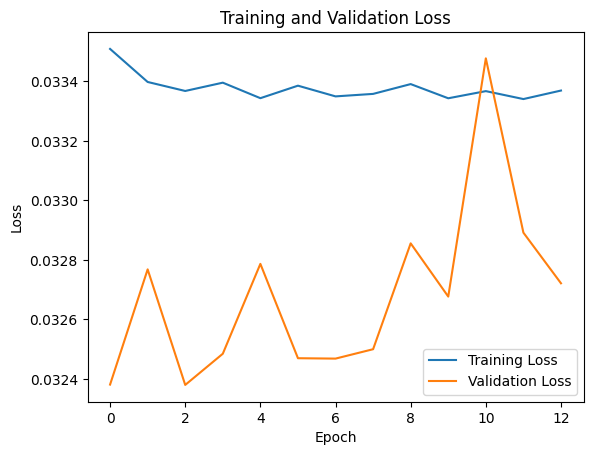

In [18]:
import matplotlib.pyplot as plt

# Get the training and validation loss values from the history object
# These lines extract the training loss and validation loss values from the history object, which was obtained during the model training.
train_loss = history.history['loss']
val_loss = history.history['val_loss']
 
# Plot the training loss and validation loss
# These lines create line plots for the training loss and validation loss values. The plot function is used to plot the values on a graph.
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
# These lines set the labels for the x-axis and y-axis, title of the plot, and enable the legend to display the labels of the plotted lines.
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
# Summary:
# The code visualizes the training and validation loss values obtained during the model training. It plots the training loss and validation loss on the same graph, with the x-axis representing the epochs and the y-axis representing the loss values. The plot provides insights into the performance of the model over the training epochs, showing how the loss values change over time.

# Testing Data

In [19]:
# These lines calculate the predictions (y_hat) using the trained model on the test data (x_test). 
# Then, the inverse transform is applied to y_hat and y_test using the min_max_scaler to obtain the actual
# values in their original scale. The predicted values (y_hat_inversed) and actual 
# values (y_test_inversed) are converted to flat list
Results_test = {}
y_hat = model.predict(x_test)
y_hat_inversed = min_max_scaler.inverse_transform(y_hat.reshape(-1,1)).flatten().tolist()
y_test_inversed = min_max_scaler.inverse_transform(y_test.reshape(-1,1)).flatten().tolist()

# These lines create a dictionary Results_test to store the predicted values, actual values, and index values.
# The predicted and actual values are assigned to the corresponding keys, and the index values are generated using np.arange()
Results_test['y_hat'] =y_hat_inversed
Results_test['y_test'] =y_test_inversed
Results_test['Index'] = np.arange(0, len(y_test_inversed))

# These lines create a DataFrame results_df_test from the Results_test dictionary. The DataFrame is then displayed.
results_df_test = pd.DataFrame.from_dict(Results_test)
display(results_df_test)


# Plotting
fig = go.Figure()
fig.add_trace(go.Scatter(x=results_df_test['Index'], y=results_df_test['y_hat'], name='Predicted',mode='markers+lines'))
fig.add_trace(go.Scatter(x=results_df_test['Index'], y=results_df_test['y_test'], name='Actual' ,mode='markers+lines'))
fig.update_layout(
            xaxis_title='Index',
            yaxis_title='Value',
            title='Tesing Data Predicted vs Actual Curves'
        )
fig.write_html('plots/LSTM-predicted_actual_curves.html')

fig.show()

# Summary:
# The code calculates the predictions of the LSTM model on the test data and transforms them back to their original scale.
# It creates a DataFrame to store the predicted and actual values along with their corresponding indices. 
# Then, it generates a plot using Plotly with separate lines for the predicted and actual values.
# The plot is saved as an HTML file and displayed. 
# This allows visual comparison between the predicted and actual values of the testing data.

2023-06-15 06:44:47.612219: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-15 06:44:47.613531: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-15 06:44:47.614995: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

35/35 [==============================] - 1s 2ms/step


,y_hat,y_test,Index
0,28.736103,30.400977,0
1,28.678045,37.112743,1
2,28.684761,144.535865,2
3,28.704615,296.136337,3
4,28.697298,251.992852,4
...,...,...,...
1114,28.663902,24.435390,1114
1115,28.691490,80.591582,1115
1116,28.695629,52.420814,1116
1117,28.684900,46.189453,1117


In [20]:

Results_train = {}

# for Training data 
y_train_hat = model.predict(x_train)
y_train_hat_inversed = min_max_scaler.inverse_transform(y_train_hat.reshape(-1,1)).flatten().tolist()
y_train_inversed = min_max_scaler.inverse_transform(y_train.reshape(-1,1)).flatten().tolist()

Results_train['y_train_hat'] =y_train_hat_inversed
Results_train['y_train'] =y_train_inversed
Results_train['Index'] = np.arange(0, len(y_train_inversed))
results_df_train = pd.DataFrame.from_dict(Results_train)
display(results_df_train)



# Plotting
fig = go.Figure()
fig.add_trace(go.Scatter(x=results_df_train['Index'], y=results_df_train['y_train_hat'], name='Predicted',mode='markers+lines'))
fig.add_trace(go.Scatter(x=results_df_train['Index'], y=results_df_train['y_train'], name='Actual' ,mode='markers+lines'))
fig.update_layout(
            xaxis_title='Index',
            yaxis_title='Value',
            title='Tesing Data Predicted vs Actual Curves'
        )
fig.write_html('plots/LSTM-predicted_actual_curves.html')
fig.show()

# Summary:
# The code calculates the predictions of the LSTM model on the training data and transforms them back to their original scale. 
# It creates a DataFrame to store the predicted and actual values along with their corresponding indices 
# for the training data. Then, it generates a plot using Plotly with separate lines for the predicted and actual values. 
# The plot is saved as an HTML file and displayed. This allows visual comparison between the predicted and actual 
# values of the training data.

249/249 [==============================] - 1s 2ms/step


,y_train_hat,y_train,Index
0,28.649275,14.910907,0
1,28.642832,27.189141,1
2,28.646265,14.690256,2
3,28.647778,25.137112,3
4,28.642586,77.481583,4
...,...,...,...
7947,28.733913,21.482953,7947
7948,28.700014,22.058251,7948
7949,28.658640,21.902966,7949
7950,28.647943,19.812983,7950


In [ ]:
results_df_test

In [25]:
import numpy as np

def calculate_errors(predicted, actual):
    # Convert lists to numpy arrays
    predicted = np.array(predicted)
    actual = np.array(actual)

    # Mean Absolute Error (MAE)
    mae = np.mean(np.abs(predicted - actual))

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(np.mean((predicted - actual) ** 2))

    # Mean Squared Error (MSE)
    mse = np.mean((predicted - actual) ** 2)

    # Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100

    return mae, rmse, mse, mape
train_mae , train_rmse , train_mse,train_mape = calculate_errors(results_df_train['y_train_hat'],results_df_train['y_train'])
test_mae , test_rmse , test_mse,test_mape = calculate_errors(results_df_test['y_hat'],results_df_test['y_test'])

print('Results on Training Data')
print(f'MAE : {train_mae}\nRMSE : {train_rmse}\nMSE : {train_mse}\nMAPE : {train_mape}'.format())
print('\n')
print('Results on Testing Data')
print(f'MAE : {test_mae}\nRMSE : {test_rmse}\nMSE : {test_mse}\nMAPE : {test_mape}')

# Summary:
# The code defines a function to calculate various error metrics (MAE, RMSE, MSE, MAPE) given predicted and actual values.
# Then, the function is called to calculate the error metrics for both the training and testing data. 
# The calculated error metrics provide a quantitative assessment of the model's performance in terms of the prediction accuracy.

Results on Training Data
MAE : 39.697076236846165
RMSE : 112.90342911094713
MSE : 12747.184305010664
MAPE : 43.235800066340346


Results on Testing Data
MAE : 35.754618525090294
RMSE : 105.3481851310898
MSE : 11098.24011041437
MAPE : 31.506502193281023


In [26]:
import pandas as pd

# Read the existing error history DataFrame from CSV
error_history = pd.read_csv('errorDatabaseHistory.csv')

# Create a new record as a DataFrame
new_record = pd.DataFrame({
    'modelName': [model_name],
    'modelConfig': [model.get_config()],
    'train_rmse': [train_rmse],
    'train_mae': [train_mae],
    'train_mse': [train_mse],
    'train_mape': [train_mape],
    'test_rmse': [test_rmse],
    'test_mae': [test_mae],
    'test_mse': [test_mse],
    'test_mape': [test_mape]
})

# Append the new record to the existing error history DataFrame
error_history = pd.concat([error_history, new_record], ignore_index=True)

# Save the updated error history DataFrame to CSV
error_history.to_csv('errorDatabaseHistory.csv', index=False)


# Final

In [27]:
error_history

,modelName,modelConfig,train_rmse,train_mae,train_mse,train_mape,test_rmse,test_mae,test_mse,test_mape
0,dummay,"{'name': 'sequential', 'layers': [{'class_name...",106.952965,37.845231,11438.936808,43.444817,100.377466,33.736318,10075.635652,31.138548
1,LSTM-1,"{'name': 'sequential_1', 'layers': [{'class_na...",107.001591,37.658871,11449.340578,42.081336,100.424096,33.689043,10084.999132,30.586461
2,LSTM-3,"{'name': 'sequential_2', 'layers': [{'class_na...",102.783347,35.152541,10564.416399,40.623763,95.789844,32.560890,9175.694187,32.079805
3,LSTM-3,"{'name': 'sequential_3', 'layers': [{'class_na...",103.251317,35.915562,10660.834426,41.728774,96.362199,32.164169,9285.673437,30.291995
4,LSTM-4,"{'name': 'sequential_4', 'layers': [{'class_na...",101.024638,34.280913,10205.977487,40.162043,97.659436,32.383993,9537.365444,30.588478
5,LSTM-4,"{'name': 'sequential_5', 'layers': [{'class_na...",100.126802,33.332858,10025.376493,38.057775,97.091345,32.904764,9426.729279,32.145660
6,model_100_epochs_16_batch_3_layers_10126_param...,"{'name': 'sequential_14', 'layers': [{'class_n...",101.016434,33.369855,10204.319865,40.264601,93.264508,30.088759,8698.268419,30.238130
7,model_100_epochs_16_batch_4_layers_27926_param...,"{'name': 'sequential', 'layers': [{'class_name...",100.671157,33.040876,10134.681881,39.109739,93.469514,30.084497,8736.549997,29.420120
8,model_100_epochs_16_batch_4_layers_27926_param...,"{'name': 'sequential', 'layers': [{'class_name...",112.903429,39.697076,12747.184305,43.235800,105.348185,35.754619,11098.240110,31.506502
